In [1]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Titanic Project:©github.com/tushar2704,©kaggle.com/tusharaggarwal27, ©linkedin.com/in/tusharaggarwalinseec
In this notebook The goal is to correctly predict if someone survived the Titanic shipwreck.


**Best results :  % accuracy ()**

**Overview
1) Understand the shape of the data (Histograms, box plots, etc.)

2) Data Cleaning

3) Data Exploration

4) Feature Engineering

5) Data Preprocessing for Model

6) Basic Model Building

7) Model Tuning

8) Ensemble Modle Building

9) Results**


In [2]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
#importing the required liabraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
#Importing the required data

train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
#Checking the read data

print(train_data.head()), print(test_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

(None, None)

In [5]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
print(train_data.shape),print(test_data.shape) 

(891, 12)
(418, 11)


(None, None)

In [6]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
print(train_data.columns), print(test_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


(None, None)

# Project Planning #github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec


### Steps used for this project
#### Understand nature of the data .info() .describe()
#### Histograms and boxplots 
#### Value counts 
#### Missing data 
#### Correlation between the metrics 
#### Explore interesting themes 
#### Wealthy survive? 
#### By location 
#### Age scatterplot with ticket price 
#### Young and wealthy Variable? 
#### Total spent? 
#### Feature engineering 
#### preprocess data together or use a transformer? 
#### use label for train and test   
#### Scaling?
#### Model Baseline 
#### Model comparison with CV 

In [7]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
#Understand nature of the data .info() .describe()

print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### Notes : Column-'Age','Cabin' &'Embarked' has missing values
### Total 891 rows of data with 12 features
### 

In [8]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
# to better understand the numeric data, we want to use the .describe() method. This gives us an understanding of the central tendencies of the data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Light Data Exploration
1) For numeric data,
Made histograms to understand distributions,
Corrplot,
Pivot table comparing survival rate across numeric variables

2) For Categorical Data,
Made bar charts to understand balance of classes,
Made pivot tables to understand relationship with survival

In [9]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
#Separating numeric columns
numeric = train_data.describe().columns
numeric

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [10]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
#numeric and categorical values separately 

train_data_num = train_data[['Age','SibSp','Parch','Fare']]
train_data_cat = train_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

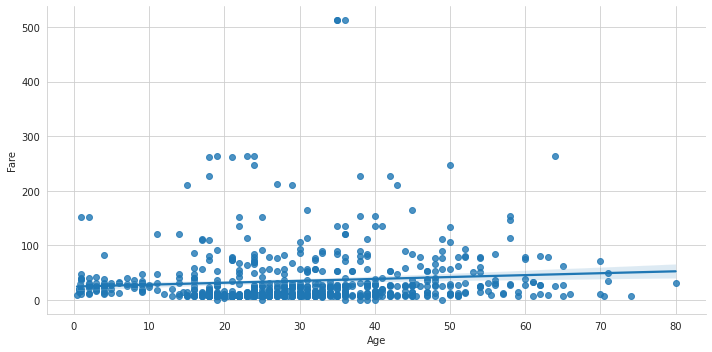

In [11]:
#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec
#distributions(histograms) for all numeric variables 

sns.set_style("whitegrid")
distributions = sns.lmplot(x='Age', y='Fare', data=train_data_num, aspect=2)